# Лабораторная работа №1
## по предмету "оптимальное управление"
```
Выполнил: студент гр. А-14м-16 Мигаль И.А
Проверил: Зубков Павел Валерьевич
```

In [ ]:
import sys
sys.path.insert(0, '/home/ivmig/OneDrive/Documents/A-14m-16/2CURSE3SEM/optimal_control/lab_1/')
print(sys.path)

In [1]:
print(__doc__)

# Author: Ivan Migal ivan.migal@mail.ru
# License: BSD 3 clause

import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import rcParams
from matplotlib import colors as mcolors
import utils

from utils import array
from utils import TDMA


colors = list(mcolors.BASE_COLORS)
colors += list(mcolors.CSS4_COLORS.keys())

Automatically created module for IPython interactive environment


In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 12, 12
plt.style.use('ggplot')
# Настройка шрифта
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

---
# Инициализация данных
```
    Обозначения см. в описании Л.Р. №1
    
```

In [3]:
# Словарь параметров
p_d = {}

In [4]:
# Заданные положительные величины
p_d['a'], p_d['l'], p_d['v'], p_d['T'] = 5., 1., 1., 2.

# Решение тестового примера
def x(s, t):
    return math.sin(t) + math.sin(s + math.pi / 2.)

# Плотность источников тепла
def f(s, t):
    return math.cos(t) + p_d['a'] ** 2 * math.sin(s + math.pi / 2.)
    
# Температура внешней среды
def p(t):
    #return 1. / p_d['v'] * math.cos(p_d['l'] + math.pi / 2) + math.sin(t) + math.sin(p_d['l'] + math.pi / 2)
    return 0.
    
# Распределение температуры в начальный момент времени
def fi(s):
    return math.sin(s + math.pi / 2.)

p_d['p(t)'] = p

p_d['f(s, t)'] = f

# Заданные числа
p_d['p_min'], p_d['p_max'], p_d['R'] = -100., 100., 100.

p_d['fi(s)'] = fi

# Желаемое распределение температуры
def y(s):
    #return s * math.sin(s + math.pi / 2.)
    return math.sin(p_d['T']) + math.sin(s + math.pi / 2.)

p_d['y(s)'] = y

# Число точек на пространственной и временной сетке соответственно
N = 10
p_d['N'], p_d['M'] = N, 10 + N * N

# Шаг на пространственной и временной сетке соответственно
p_d['dh'], p_d['dt'] = p_d['l'] / p_d['N'], p_d['T'] / p_d['M']
p_d['l'], p_d['T'], p_d['dh'], p_d['dt']

(1.0, 2.0, 0.1, 0.01818181818181818)

---
# Создание модели и управление

In [5]:
model = utils.Lab1OptCtrlModel(p_d)

In [6]:
criterion = utils.criterion_3
get_alpha = utils.get_alpha_5

In [7]:
model.solve(criterion, get_alpha, eps=10**-5)

90909.09090909091
14954.6035097
422131.391078
504766.266124
462585.095536
472419.570939
445003.072426
441018.496777
425151.923515
415139.437223
400547.95428
392061.472914
380193.73795
363307.451353
354090.558083
342787.117081
332346.260823
313065.766161
301106.923446
288326.126141
279834.818733
269201.435615
249482.99879
229636.077746
214781.465425
201063.297841
191066.190571
181153.838986
174048.65109
166488.056849
161227.048285
155224.822428
151212.722672
146298.292348
143170.939727
139046.804297
127597.02998
107697.769458
83455.9436711
59497.3177627
38977.0981041
23496.0714168
13019.6951986
6638.66476052
3111.21750953
1341.39840319
531.260004683
193.488892336
64.6606486873
19.862327292
5.58721886425
1.44470384065
0.340779078998
0.0740631674519
0.0145473129455
0.00266631387742
0.0004290203876
6.9544182424e-05
9.78399532111e-06


In [8]:
model.final_step

58

In [9]:
X_ = np.arange(0., p_d['l'] + p_d['dh'], p_d['dh'])
Y_ = np.arange(0., p_d['T'] + p_d['dt'], p_d['dt'])

---
# Процесс управления

In [10]:
y_s = model.y_arr
bounds = [min(min(y_s), min(model.x_arr[-1][-1,:])), max(max(y_s), max(model.x_arr[-1][-1,:]))]

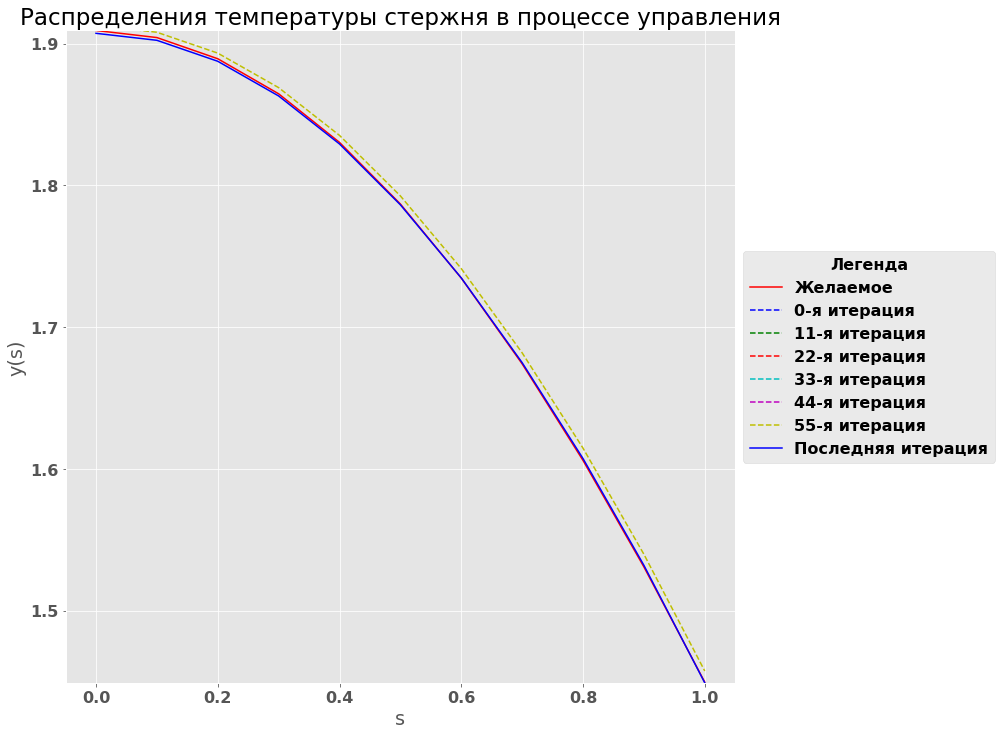

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X_, y_s, color='r', label='Желаемое')
part = 1
count = 5
step = int(model.final_step / count / part)
for i in range(0, int(model.final_step / part), step):
    ax.plot(X_, model.x_arr[i][-1,:], color=colors[int(i / step)], linestyle='--', label='{}-я итерация'.format(i))
ax.plot(X_, model.x_arr[-1][-1,:], color='b', label='Последняя итерация')
ax.set_ylim(bounds)
plt.xlabel('s')
plt.ylabel('y(s)')
plt.title('Распределения температуры стержня в процессе управления')
plt.legend(title='Легенда', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

---
# Желаемое и полученное распределение температур

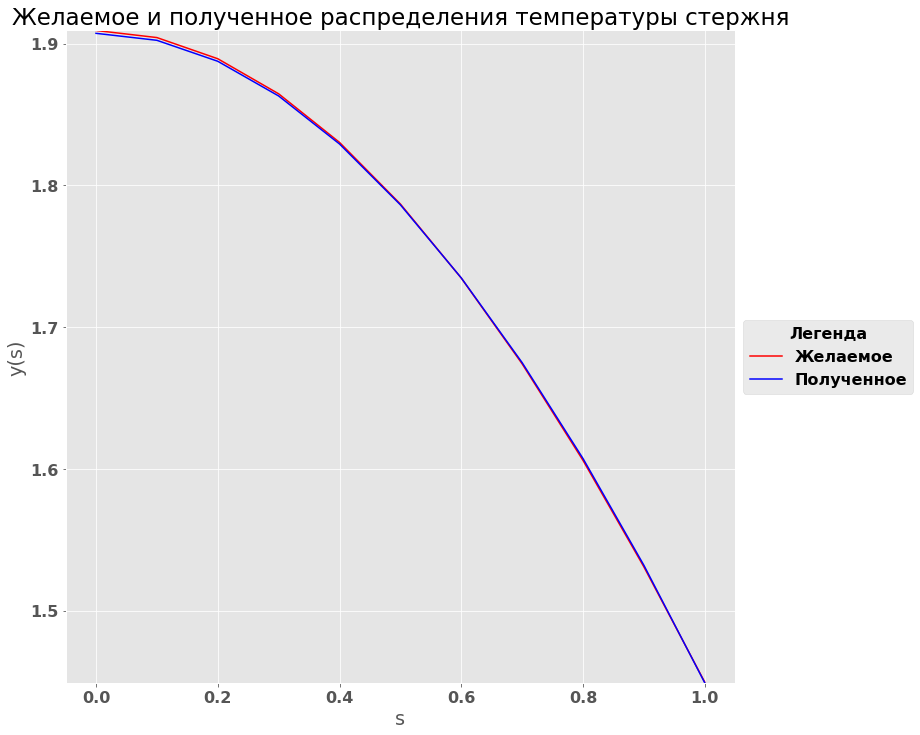

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X_, y_s, color='r', label='Желаемое')
ax.plot(X_, model.x_arr[-1][-1,:], color='b', label='Полученное')
ax.set_ylim(bounds)
plt.xlabel('s')
plt.ylabel('y(s)')
plt.title('Желаемое и полученное распределения температуры стержня')
plt.legend(title='Легенда', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

---
# Управление

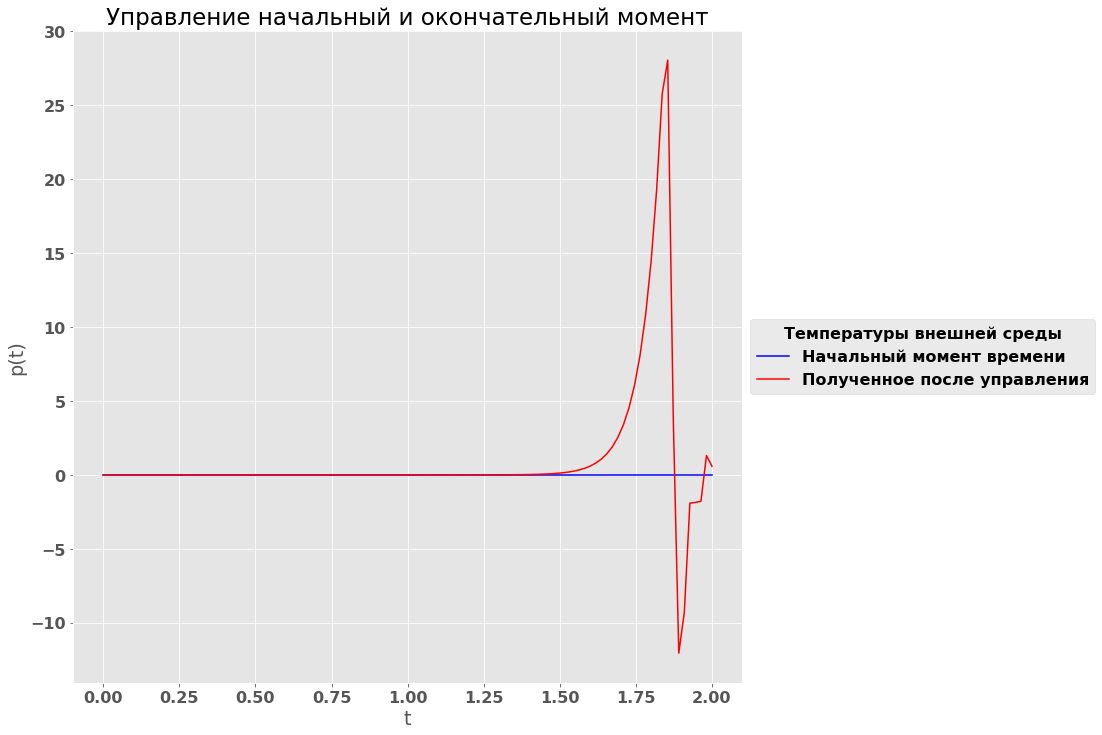

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(Y_, model.p_arr[0], color='b', label='Начальный момент времени')
ax.plot(Y_, model.p_arr[-1], color='r', label='Полученное после управления')
plt.xlabel('t')
plt.ylabel('p(t)')
plt.title('Управление начальный и окончательный момент')
plt.legend(title='Температуры внешней среды', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

---
# График изменения ошибки

(9.7839953211067542e-06, 0.10000978399532111)

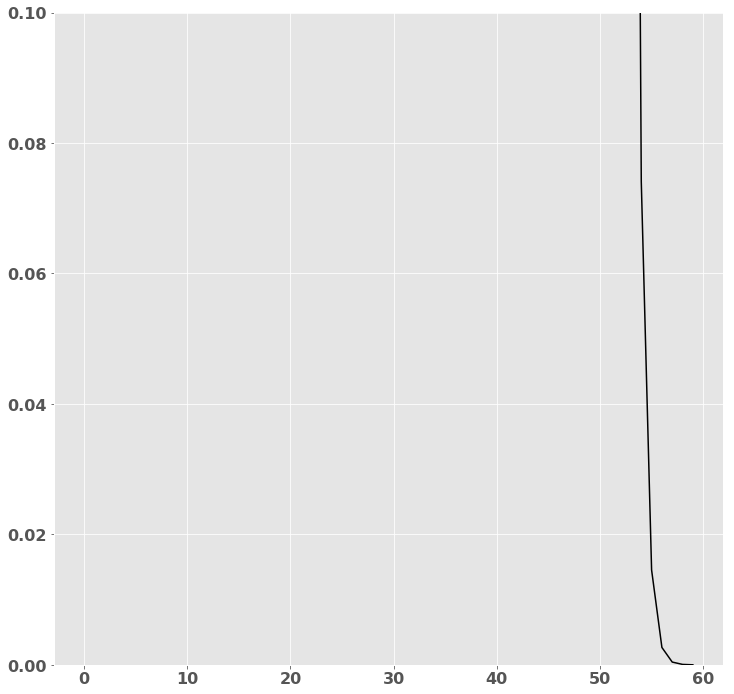

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(model.err, color='black', label='Ошибка')
ax.set_ylim([min(model.err), min(model.err) + .1])